<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2018-01-21 to 2019-04-21
Data columns (total 7 columns):
total_entrez_gene           66 non-null int64
total_ensembl_gene          66 non-null int64
total_ensembl_other_gene    66 non-null int64
total_merged_gene           66 non-null int64
version_entrez              66 non-null int64
version_ensembl             66 non-null int64
version_ensembl_other       66 non-null object
dtypes: int64(6), object(1)
memory usage: 4.1+ KB


,total_entrez_gene,total_ensembl_gene,total_ensembl_other_gene,total_merged_gene,version_entrez,version_ensembl,version_ensembl_other
data,,,,,,,
2018-01-21,20313133,2273596,0,21686111,20180120,91,0
2018-02-04,20404516,2273596,0,21777526,20180203,91,0
2018-02-11,20527819,2273596,0,21900829,20180210,91,0
2018-02-18,20757784,2273596,0,22130811,20180217,91,0
2018-02-25,20802734,2273596,0,22175758,20180224,91,0
2018-02-26,20802734,2273596,0,22175758,20180224,91,0
2018-03-04,20692425,2273596,0,22065464,20180303,91,0
2018-03-11,20723651,2273596,0,22096690,20180309,91,0
2018-03-18,20763367,2273596,0,22136437,20180316,91,0


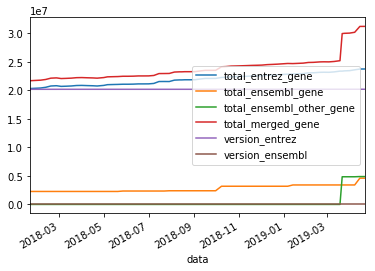

In [170]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("totals.csv",
                 index_col=0,
                 parse_dates=[0],)
                 #date_parser=lambda d: datetime.strptime(d,"%d/%m/%Y"))
df.version_ensembl_other.replace('None', 0, inplace=True)
df.info()
df.head()
df.plot()
df

In [34]:
df = df.asfreq("1d",method="bfill")
df.info()
#df



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 456 entries, 2018-01-21 to 2019-04-21
Freq: D
Data columns (total 7 columns):
total_entrez_gene           456 non-null int64
total_ensembl_gene          456 non-null int64
total_ensembl_other_gene    456 non-null int64
total_merged_gene           456 non-null int64
version_entrez              456 non-null int64
version_ensembl             456 non-null int64
version_ensembl_other       456 non-null object
dtypes: int64(6), object(1)
memory usage: 28.5+ KB


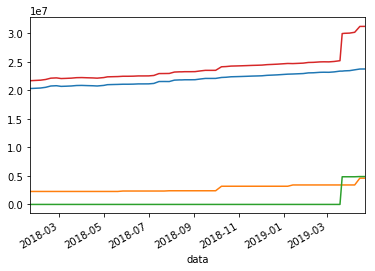

In [55]:
%matplotlib inline
df.total_entrez_gene.plot()
df.total_ensembl_gene.plot()
df.total_ensembl_other_gene.plot()
df.total_merged_gene.plot()

       total_merged_gene
count          16.000000
mean          675.176871
std         18503.368290
min        -30739.108844
25%        -11652.340986
50%           333.200680
75%         11551.801871
max         32089.462585


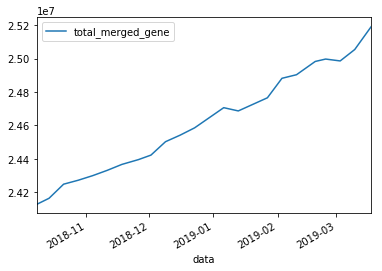

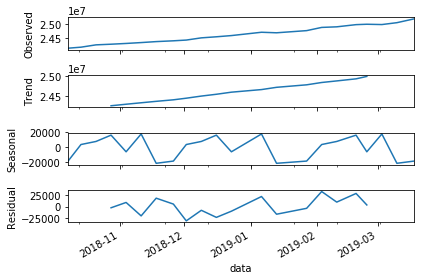

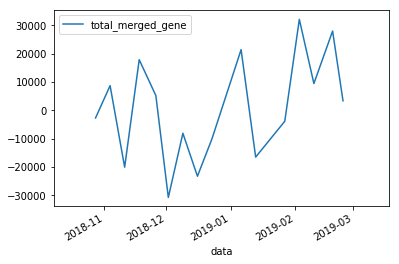

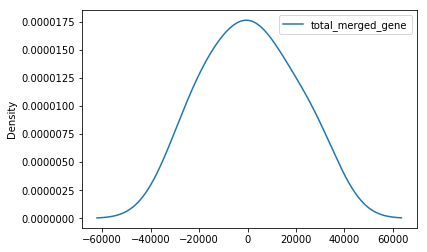

In [167]:
from statsmodels.tsa.seasonal import seasonal_decompose
subdf = df[["total_merged_gene"]][38:-6]
subdf.plot()
decomp = seasonal_decompose(subdf,freq=7)
decomp.plot()
residuals = pd.DataFrame(decomp.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

       total_merged_gene
count          17.000000
mean       -35314.166667
std        155308.981742
min       -539164.976190
25%        -46023.833333
50%        -32632.119048
75%        -18133.095238
max        237353.595238


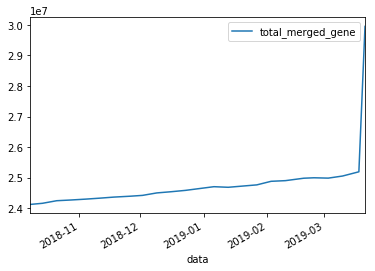

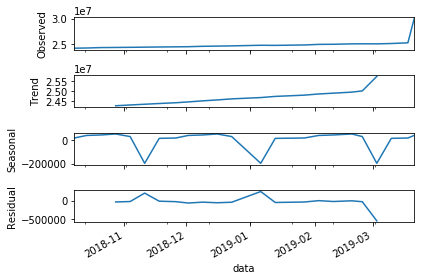

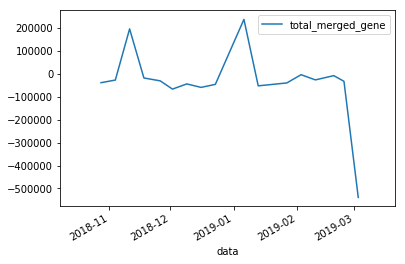

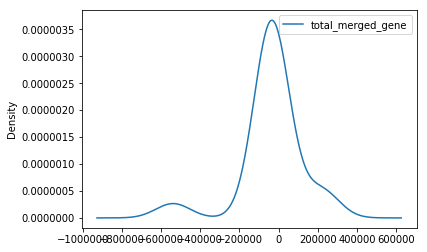

In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose
subdf = df[["total_merged_gene"]][38:-5]
subdf.plot()
decomp = seasonal_decompose(subdf,freq=7)
decomp.plot()
residuals = pd.DataFrame(decomp.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

(1.2049469007368017, 0.9960198839738096, 0, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, 1602.010960271799)


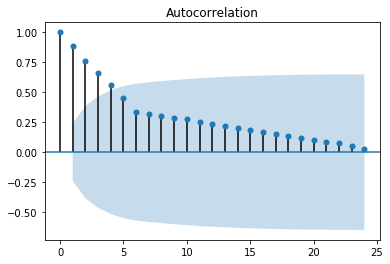

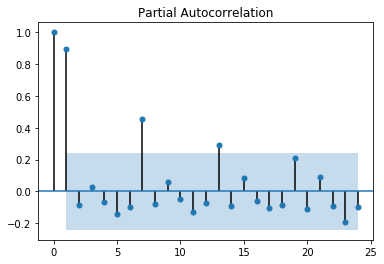

In [68]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
print(adfuller(df.total_merged_gene))
_ = plot_acf(df.total_merged_gene,lags=24)
_ = plot_pacf(df.total_merged_gene,lags=24)

data
2018-01-21         NaN
2018-02-04     91415.0
2018-02-11    123303.0
2018-02-18    229982.0
2018-02-25     44947.0
Name: total_merged_gene, dtype: float64
(-7.934786146264112, 3.436628319011393e-12, 0, 64, {'1%': -3.53692771987915, '5%': -2.907887369384766, '10%': -2.591493291015625}, 1574.2573254986905)


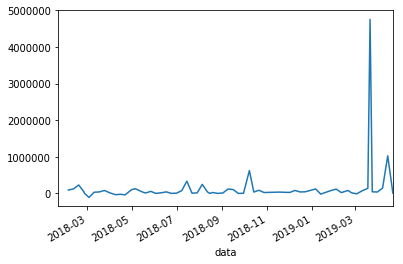

In [87]:

ddf = df.total_merged_gene.diff(periods=1)
#print(ddf)
print(ddf.head())
print(adfuller(ddf[1:]))
_ = ddf.plot()

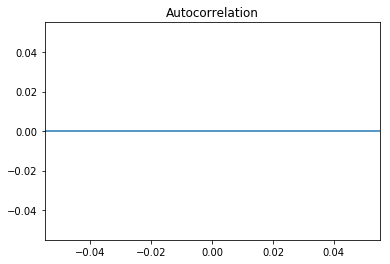

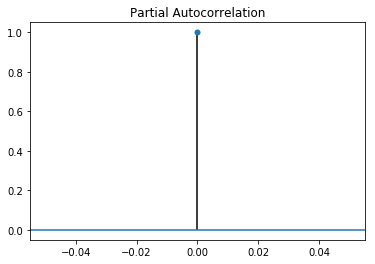

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
_ = plot_acf(ddf,lags=24)
_ = plot_pacf(ddf,lags=24)

/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARIMA Model Results                              
Dep. Variable:     D.total_merged_gene   No. Observations:                   65
Model:                  ARIMA(2, 1, 1)   Log Likelihood                -956.595
Method:                        css-mle   S.D. of innovations         595941.173
Date:                 Mon, 29 Apr 2019   AIC                           1923.190
Time:                         10:22:04   BIC                           1934.062
Sample:                              1   HQIC                          1927.480
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.465e+05   7.15e+04      2.048      0.045    6284.086    2.87e+05
ar.L1.D.total_merged_gene     0.0332      1.304      0.025      0.980      -2.

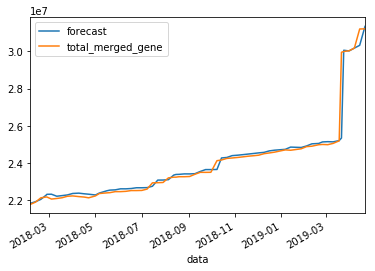

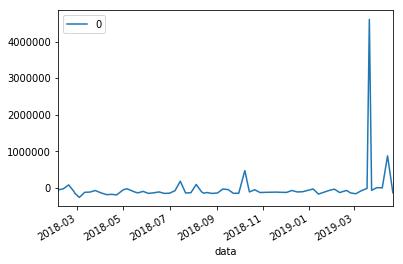

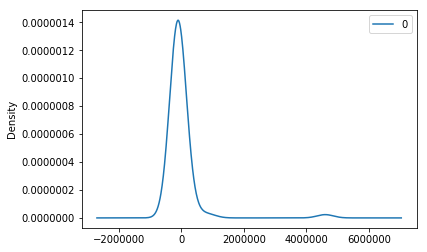

                  0
count  6.500000e+01
mean  -2.855185e+02
std    6.005789e+05
min   -2.604398e+05
25%   -1.362816e+05
50%   -1.124333e+05
75%   -5.086919e+04
max    4.605174e+06


In [94]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
mar = ARIMA(df.total_merged_gene,order=(2,1,1))
fmar = mar.fit()
print(fmar.summary())
_ = fmar.plot_predict()
#fmar.resid
residuals = pd.DataFrame(fmar.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())



In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
ddf = df.diff().diff(14)
plt.plot(ddf[-180:])
print(adfuller(ddf[-180:].release))
_ = plot_acf(ddf[-180:],lags=10)
_ = plot_pacf(ddf[-180:],lags=10)
ddf[-180:].plot()
sar = SARIMAX(ddf[-180:],order=(0,1,0),seasonal_order=(0,1,0,14))
fsar = sar.fit()
print(fsar.summary())
_ = fsar.plot_predict()



TypeError: unsupported operand type(s) for -: 'str' and 'int'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2329 entries, 2012-11-17 to 2019-04-03
Freq: D
Data columns (total 1 columns):
0    2329 non-null int64
dtypes: int64(1)
memory usage: 36.4 KB
(-3.861559790845832, 0.002336682627617137, 14, 165, {'1%': -3.470616369591229, '10%': -2.57619681359045, '5%': -2.8792214018977655}, 437.44248824002227)
                                 Statespace Model Results                                 
Dep. Variable:                                  0   No. Observations:                  180
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 15)   Log Likelihood                -446.533
Date:                            Tue, 16 Apr 2019   AIC                            895.066
Time:                                    15:43:10   BIC                            898.166
Sample:                                10-06-2018   HQIC                           896.324
                                     - 04-03-2019                                         
Covariance Typ

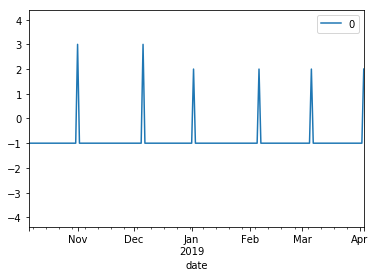

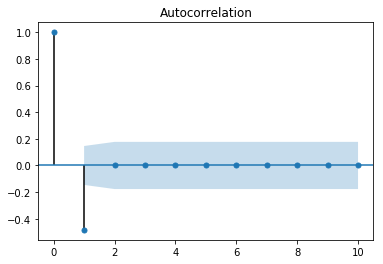

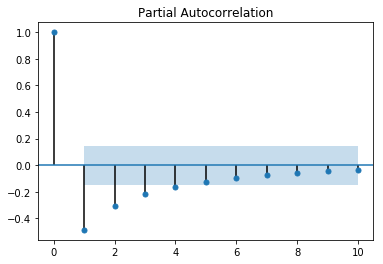

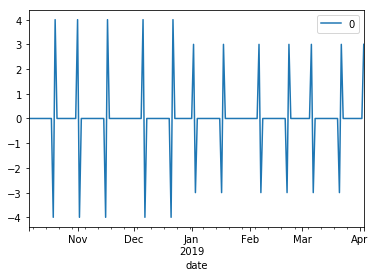

In [241]:
dowidx = []
df = pd.read_csv("clinvar.csv",
                 index_col=0,
                 parse_dates=[0],)
                 #date_parser=lambda d: datetime.strptime(d,"%d/%m/%Y"))
for d in df.index:
    dowidx.append(d.weekday())
dowdf = pd.DataFrame(dowidx,df.index)
dowdf = dowdf.asfreq("1d",fill_value=-1)
dowdf.info()
dowdf[-180:].plot()
#
ddowdf = dowdf.diff().diff(15)
plt.plot(ddowdf[-180:])
print(adfuller(ddowdf[-180:][0]))
_ = plot_acf(ddowdf[-180:],lags=10)
_ = plot_pacf(ddowdf[-180:],lags=10)
ddowdf[-180:].plot()
sar = SARIMAX(ddowdf[-180:],order=(0,1,0),seasonal_order=(0,1,0,15),enforce_invertibility=False)
fsar = sar.fit()
print(fsar.summary())